<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_06_Decision_Trees_Ensemble_Methods_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Decision Trees & Ensemble Methods

In [ ]:
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


## Part 1. Human Resources

The "Human_Resources.csv" dataset contains various features related to employees, such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent at the company, work accidents, promotions, salary, and whether the employee left the company within the last year (target variable)


<Axes: xlabel='left', ylabel='count'>

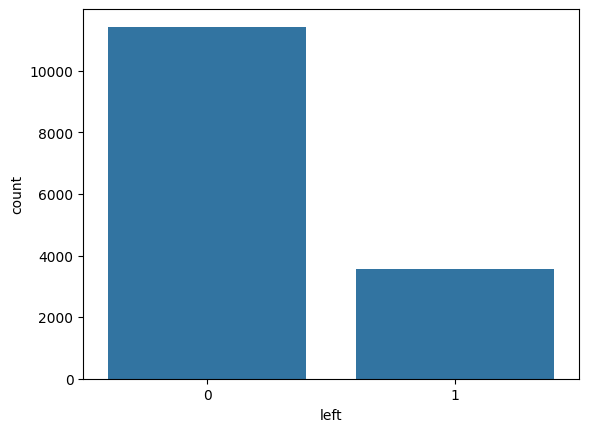

In [ ]:
# Load the "Human_Resources.csv" dataset into a Pandas DataFrame.
dataset = pd.read_csv('/content/Human_Resources.csv')
dataset.head()


# Explore the dataset to understand its structure and characteristics.
dataset.describe()


#Check for missing values and handle them appropriately.
dataset.isnull().sum()
sns.countplot(x='left',data=dataset)


In [ ]:
# Perform feature engineering, such as encoding categorical variables (e.g., salary)
# and handling any necessary data transformations.
# one-hot encoding

dataset = pd.concat([dataset,pd.get_dummies(dataset['department'], prefix='department')],axis=1)
dataset.drop(['department'],axis=1, inplace=True)
dataset = pd.concat([dataset,pd.get_dummies(dataset['salary'], prefix='salary')],axis=1)
dataset.drop(['salary'],axis=1, inplace=True)

y = dataset['left'].values
X = dataset.drop(['left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000, random_state=0)

print(X_test.shape)

# To avoid conversion warning:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform((X_train))
X_test = scaler.transform(X_test)




# Split the data into training and testing sets.



(4000, 20)


In [ ]:
# Choose an appropriate machine learning algorithm for binary classification.
# Try the following models: Logistic Regression, Decision Trees
# Random Forest, Adaboost and Gradient Boosting).
model = LogisticRegression()
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear']}

             ]

grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


# Train the model on the training data.

Best accuracy :  0.7887085038653934
Best parameters : {'C': np.float64(100.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.58      0.35      0.44       918

    accuracy                           0.79      4000
   macro avg       0.70      0.64      0.65      4000
weighted avg       0.77      0.79      0.77      4000

[[2847  235]
 [ 597  321]]
79.2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

number_of_estimators = 50
complexity = 1.0  # Use a more reasonable value for C
cart = LogisticRegression(C=complexity, solver='liblinear', max_iter=500)

lregbagging = BaggingClassifier(estimator=cart, n_estimators=number_of_estimators, n_jobs=-1)

lregbagging.fit(X_train, y_train)

y_pred = lregbagging.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.57      0.34      0.43       918

    accuracy                           0.79      4000
   macro avg       0.70      0.63      0.65      4000
weighted avg       0.77      0.79      0.77      4000

[[2848  234]
 [ 604  314]]
79.05


In [ ]:
# Decision tree

DTclassifier = DecisionTreeClassifier(class_weight='balanced')
DTclassifier.fit(X_train,y_train)

y_pred = DTclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3082
           1       0.94      0.97      0.95       918

    accuracy                           0.98      4000
   macro avg       0.96      0.98      0.97      4000
weighted avg       0.98      0.98      0.98      4000

[[3020   62]
 [  26  892]]
97.8


In [ ]:
# Random Forest Classifier
number_of_trees = 500
max_number_of_features = 13

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features,class_weight='balanced')


RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)

# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)




[0.34931128 0.1177302  0.08946755 0.12559666 0.28755649 0.00216962
 0.00057341 0.00125549 0.00134654 0.00139716 0.0015207  0.00084799
 0.00116154 0.0006523  0.00304476 0.00280635 0.00502194 0.001347
 0.00437694 0.00281607]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3071   11]
 [  23  895]]
99.15


In [ ]:
# Adaboost

clf_adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=0.90)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3082
           1       0.90      0.83      0.87       918

    accuracy                           0.94      4000
   macro avg       0.93      0.90      0.91      4000
weighted avg       0.94      0.94      0.94      4000

[[2998   84]
 [ 152  766]]
94.1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cart = LogisticRegression(C=1.0, solver='liblinear', max_iter=500)
logreg_adaboost = AdaBoostClassifier(estimator=cart, n_estimators=50, learning_rate=0.9)
logreg_adaboost.fit(X_train, y_train)

y_pred = logreg_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3082
           1       0.49      0.25      0.33       918

    accuracy                           0.77      4000
   macro avg       0.64      0.58      0.59      4000
weighted avg       0.73      0.77      0.74      4000

[[2840  242]
 [ 690  228]]
76.7


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set the parameters
clf_gradientboost = GradientBoostingClassifier(
    n_estimators=300,            # Use fewer trees to reduce overfitting
    learning_rate=0.05,          # Lower learning rate for stability
    max_depth=4,                 # Limit tree depth to prevent overfitting
    min_samples_split=10,        # Require more samples per split
    min_samples_leaf=5,          # Require a minimum number of samples per leaf
    subsample=0.8,               # Use stochastic gradient boosting
    random_state=42
)

# Train the model
clf_gradientboost.fit(X_train, y_train)

# Predict on the test set
y_pred = clf_gradientboost.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.97      0.95      0.96       918

    accuracy                           0.98      4000
   macro avg       0.98      0.97      0.98      4000
weighted avg       0.98      0.98      0.98      4000

[[3058   24]
 [  46  872]]
Accuracy: 98.25


In [ ]:
#### Classification with XGBoost

from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=1000,max_depth=15)
clf_xgb.fit(X_train,y_train)

y_pred = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.98      0.97      0.97       918

    accuracy                           0.99      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

[[3062   20]
 [  26  892]]
98.85000000000001


In [ ]:
# valuate the model's performance on the testing dataset using relevant metrics such as accuracy, precision, recall, and F1-score.


# Visualize the model's performance using a confusion matrix.


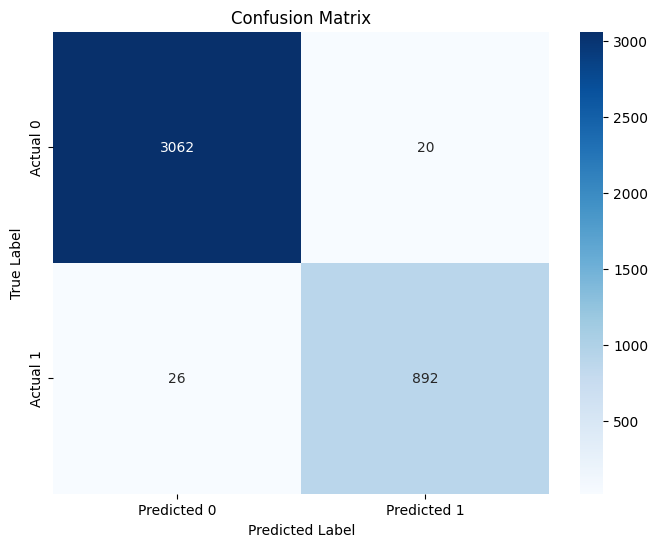

In [ ]:
# prompt: # valuate the model's performance on the testing dataset using relevant metrics such as accuracy, precision, recall, and F1-score.
# # Visualize the model's performance using a confusion matrix.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from a previous model (e.g., clf_xgb)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Experiment with different hyperparameters to optimize the model's performance.
from sklearn.preprocessing import PolynomialFeatures


# Higher order features
graad = 2

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimensie van X_train_poly: ',X_train_poly.shape)
print('dimensie van X_test_poly: ',X_test_poly.shape)


# Ridge regression
lregmodel_poly = Ridge(alpha=5,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score on test set with L2: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 op de trainingset
print('R2 score on training set with L2: ',lregmodel_poly.score(X_train_poly,y_train))



# Lasso regression
lregmodel_poly = Lasso(alpha=3,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)


print('R2 score on test set with L1: ',lregmodel_poly.score(X_test_poly,y_test))

# R2 -score via L1 op de trainingset
print('R2 score on training set with L1: ',lregmodel_poly.score(X_train_poly,y_train))


dimensie van X_train_poly:  (10999, 231)
dimensie van X_test_poly:  (4000, 231)
R2 score on test set with L2:  0.6194948216577908
R2 score on training set with L2:  0.6400086629472967
R2 score on test set with L1:  -0.0007746302058089238
R2 score on training set with L1:  0.0


In [ ]:
# Random Forest Regressor

RFR_model = RandomForestRegressor(n_estimators=150)
RFR_model.fit(X_train_poly,y_train)

RFR_model.score(X_test_poly,y_test)

0.9183230071737237

In [ ]:
# Determine the most important features that contribute to employee turnover.
# You can use the feature_importances values computed by a random forest tree
# more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Visualize feature importance scores if applicable.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Train the RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=150, random_state=42)
RFCmodel.fit(X_train, y_train)

# Get feature importance scores
importance_scores = RFCmodel.feature_importances_

# Get feature names (assuming your features are in a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))



                 Feature  Importance
0     satisfaction_level    0.296610
2         number_project    0.184374
4     time_spend_company    0.177350
3   average_montly_hours    0.163230
1        last_evaluation    0.128421
5          work_accident    0.010339
18            salary_low    0.007213
17           salary_high    0.005721
16  department_technical    0.003543
19         salary_medium    0.003528


           Feature  Importance
0     satisfaction_level    0.296610
2         number_project    0.184374
4     time_spend_company    0.177350
3   average_montly_hours    0.163230
1        last_evaluation    0.128421 these are the moest important features.

the models that are  suffering the most from unblancedness are logisticregression and logistcregressonclasifier and adabosstclassifier

random forrest classifier  is the best model  as you can see [0.34931128 0.1177302  0.08946755 0.12559666 0.28755649 0.00216962
 0.00057341 0.00125549 0.00134654 0.00139716 0.0015207  0.00084799
 0.00116154 0.0006523  0.00304476 0.00280635 0.00502194 0.001347
 0.00437694 0.00281607]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3071   11]
 [  23  895]]
99.15

1. Precision, Recall, and F1-Score (Per Class)
These metrics are the most direct indicators of class imbalance issues:

Precision (Positive Class): How many of the predicted positives are actually positive?

Recall (Positive Class): How many of the actual positives were correctly identified?

F1-Score (Positive Class): The harmonic mean of precision and recall, balancing both metrics.

What to Watch For:

Low Recall for the Minority Class: Indicates the model is missing many actual positive cases.

Low Precision for the Minority Class: Indicates the model is predicting too many false positives.

Large Gap Between Majority and Minority Class Metrics: Suggests the model is biased towards the majority class.



i would recommend the randomforestclassifier.

Write down your conclusions:

- Which is your prefered model and why?
- Which features are the most important ones?
- Which models are suffering from unbalancedness?
- Would you advice the company to use one of these models?


## Part 2. Energy consumption

Every ten minutes the temperture (in degrees Celcius) and the humidity (in %) of a well insulated house was measured for a couple of months. There is also available weather data from a nearby weather station.
The power consumption of the electric lighting, together with the power consumption of other electrical appliences was recorded during that period same period.

All measurements can be found in 'Energy_consumption.csv'

The variables have the following meaning:

- date: time year-month-day hour:minute:second
- Appliances: energy use in Wh
- lights: energy use of light fixtures in the house in Wh
- T1: Temperature in kitchen area, in Celsius
- RH_1: Humidity in kitchen area, in %
- T2: Temperature in living room area, in Celsius
- RH_2: Humidity in living room area, in %
- T3: Temperature in laundry room area
- RH_3: Humidity in laundry room area, in %
- T4: Temperature in office room, in Celsius
- RH_4: Humidity in office room, in %
- T5: Temperature in bathroom, in Celsius
- RH_5: Humidity in bathroom, in %
- T6: Temperature outside the building (north side), in Celsius
- RH_6: Humidity outside the building (north side), in %
- T7: Temperature in ironing room , in Celsius
- RH_7: Humidity in ironing room, in %
- T8: Temperature in teenager room 2, in Celsius
- RH_8: Humidity in teenager room 2, in %
- T9: Temperature in parents room, in Celsius
- RH_9: Humidity in parents room, in %
- To: Temperature outside (from Chievres weather station), in Celsius
- Pressure: (from Chievres weather station), in mm Hg
- RH_out: Humidity outside (from Chievres weather station), in %
- Wind speed: (from Chievres weather station), in m/s
- Visibility: (from Chievres weather station), in km
- Tdewpoint: (from Chievres weather station),
- rv1: Random variable 1, nondimensional
- rv2: Random variable 2, nondimensional


The random variables rv1 and rv2 can be removed from the dataset.


The goal of this assignment is to train a regression model that can predict as precisely as possible the electricity consumption of the appliences from the other variables.

In [ ]:
dataset = pd.read_csv('Energy_consumption.csv')
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


1. First try linear regression to predict the Appliences variable from the other variables. Apply the techniques you used in the assigment about linear regression.
2. Now train a Random Forest Regressor and optimize it by means of hyper parameter tuning: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


You get all the freedom to use the techniques and tricks you want. Your only goals is to achieve the best R²-score on a test set consisting of 5000 samples. It might be useful to use the date and time of the day as features.

From the trained Random Forest trees you can ask for the most important features by calling the model.feature_importances_.
Give the top 5 most important features. Do they make sense? Explain.


In [ ]:
# Convert and split date into month, day, hour
dataset['date'] = pd.to_datetime(dataset.date)
dataset.insert(0,'month', dataset['date'].dt.month)
dataset.insert(0,'day',  dataset['date'].dt.weekday)
dataset.insert(0,'hour', dataset['date'].dt.hour)
dataset['month'] = dataset['month'].apply(lambda x: calendar.month_name[x])
dataset['day'] = dataset['day'].apply(lambda x: calendar.day_name[x])

dataset.drop('date',axis=1,inplace=True)

dataset.head()

,hour,day,month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,17,Monday,January,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,17,Monday,January,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,17,Monday,January,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,17,Monday,January,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,17,Monday,January,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# Remove rv1 and rv2 from the dataset
dataset.drop(['rv1','rv2'],axis=1,inplace=True)
dataset.head()



,hour,day,month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,17,Monday,January,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,17,Monday,January,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,17,Monday,January,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,17,Monday,January,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,17,Monday,January,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [ ]:
# One-hot encoding of the categorical features

dataset = pd.get_dummies(dataset, columns=['month','day'])
dataset.head()



,hour,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month_April,month_February,month_January,month_March,month_May,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,17,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,False,False,True,False,False,False,True,False,False,False,False,False
1,17,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,False,False,True,False,False,False,True,False,False,False,False,False
2,17,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,False,False,True,False,False,False,True,False,False,False,False,False
3,17,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,False,False,True,False,False,False,True,False,False,False,False,False
4,17,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,False,False,True,False,False,False,True,False,False,False,False,False


In [ ]:
# Split into features and targets

X = dataset.drop('Appliances',axis=1)
y = dataset['Appliances']


In [ ]:
# Split into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [ ]:
# MinMax scaling

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression # Import LinearRegression

lregmodel = LinearRegression()
lregmodel.fit(X_train,y_train)

print('R2 score on test set: ',lregmodel.score(X_test,y_test))

R2 score on test set:  0.16554005789628223


In [ ]:
# Model optimization and hyperparameter tuning of the linear regression model. You are allowed to use features expansion (hihger order features)



In [ ]:
# prompt: # Model optimization and hyperparameter tuning of the linear regression model. You are allowed to use features expansion (hihger order features)

# Higher order features
poly = PolynomialFeatures(degree=2)  # Example degree, adjust as needed
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1, 10, 100]} #Example alphas, adjust as needed
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_poly, y_train)
print("Best Ridge Regression parameters:", ridge_grid.best_params_)
print("Best Ridge Regression R2 score:", ridge_grid.best_score_)

y_pred_ridge = ridge_grid.predict(X_test_poly)
print("Ridge Regression R2 score on test set:", r2_score(y_test,y_pred_ridge))


# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.1, 1, 10]} # Example alphas, adjust as needed
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_poly, y_train)
print("Best Lasso Regression parameters:", lasso_grid.best_params_)
print("Best Lasso Regression R2 score:", lasso_grid.best_score_)

y_pred_lasso = lasso_grid.predict(X_test_poly)
print("Lasso Regression R2 score on test set:", r2_score(y_test,y_pred_lasso))


Best Ridge Regression parameters: {'alpha': 0.1}
Best Ridge Regression R2 score: 0.34024748121797277
Ridge Regression R2 score on test set: 0.3108157781175548


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.721e+04, tolerance: 1.094e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+04, tolerance: 1.104e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+04, tolerance: 1.077e

Best Lasso Regression parameters: {'alpha': 0.1}
Best Lasso Regression R2 score: 0.2381945744489359
Lasso Regression R2 score on test set: 0.22025652601387113


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.809e+04, tolerance: 1.360e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Random forest regressor. You can also try higher order features. You are allowed to use features expansion (hihger order features)
RFR_model = RandomForestRegressor(n_estimators=15)
RFR_model.fit(X_train_poly,y_train)

RFR_model.score(X_test_poly,y_test)


0.4712005198022028

Text(0, 0.5, 'R2 score')

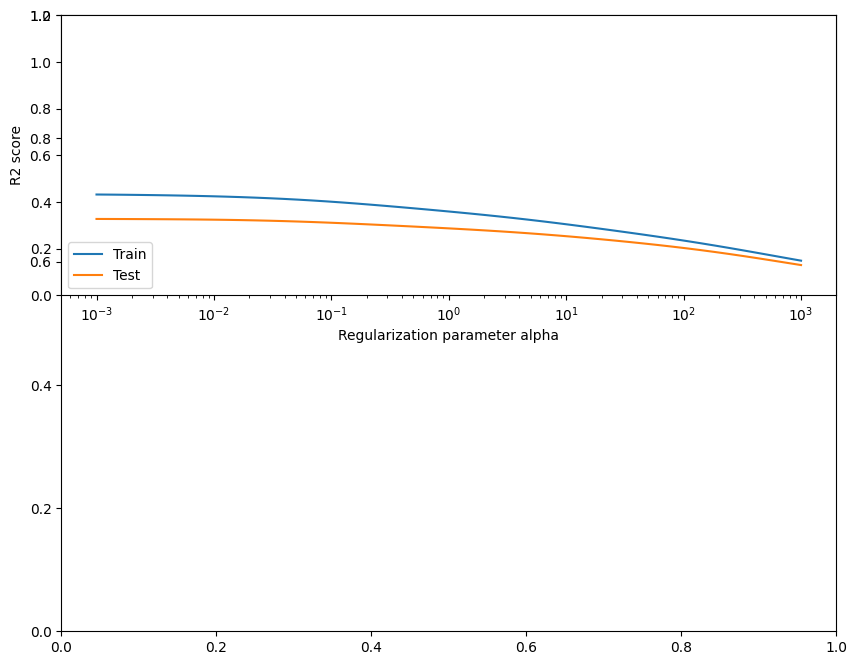

In [ ]:
# Searching for optimal alpha value

degree = 2

poly = PolynomialFeatures(degree)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)



train_r2 = []
test_r2 = []


alphas = np.logspace(-3, 3, 50)

for alpha in alphas:
    lregmodel_poly = Ridge(alpha=alpha,tol=0.0001,fit_intercept=True)
    lregmodel_poly.fit(X_train_poly,y_train)
    test_r2.append(lregmodel_poly.score(X_test_poly,y_test))
    train_r2.append(lregmodel_poly.score(X_train_poly,y_train))


# Plot r2
f, ax = plt.subplots(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_r2, label='Train')
plt.semilogx(alphas, test_r2, label='Test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter alpha')
plt.ylabel('R2 score')



In [ ]:
# Most important features + conclusions
# Determine the most important features that contribute to employee turnover.
# You can use the feature_importances values computed by a random forest tree
# more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Visualize feature importance scores if applicable.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Train the RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=15, random_state=42)
RFCmodel.fit(X_train, y_train)

# Get feature importance scores
importance_scores = RFCmodel.feature_importances_

# Get feature names (assuming your features are in a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))




        Feature  Importance
17         RH_8    0.046142
22       RH_out    0.046052
0          hour    0.045192
25    Tdewpoint    0.044649
11         RH_5    0.044192
12           T6    0.043384
19         RH_9    0.042920
20        T_out    0.042803
21  Press_mm_hg    0.042762
13         RH_6    0.042243


the most important features are         Feature  Importance
17         RH_8    0.046142
22       RH_out    0.046052
0          hour    0.045192
25    Tdewpoint    0.044649
11         RH_5    0.044192
12           T6    0.043384
19         RH_9    0.042920
20        T_out    0.042803
21  Press_mm_hg    0.042762
13         RH_6    0.042243

## Part 3 - Bank

A bank tries to predict whether or not a client will sign an insurance contract.
The file *bank.csv* contains data from over 4000 clients.
The features are the following:
- age:  age of the client.
- job:  job type the client has.
- marital:  marital status.
- education:  type of diploma.
- default: whether or not the client has been declared bankrupt.
- balance: amount of money on the account.
- housing:  whether or not the client has a housing loan.
- loan:  whether or not the client has a personal loan.
- contact: type of communication with the client.
- day: day of the last contact with the client.
- month: month of the last contact with the client.
- duration: duration of the last contact. Cannot be used to train on. Has to be discarded from the dataset.
- campaign: number of previous contacts with the client.
- pdays: number of days since the previous contact. -1 means that the client was not contacted before.
- previous:  number of previous contacts with the client.
- poutcome: outcome of a previous campaign.

The target is the y-column. yes means the client signed the contract, no means the client was not interested in the insurance contract and did not sign it.


In [ ]:
dataset = pd.read_csv('bank.csv',delimiter=';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Preprocessing

In [ ]:
# check for consitency
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Controleer of de data al dan niet gebalanceerd is. Wat zijn de conclusies?

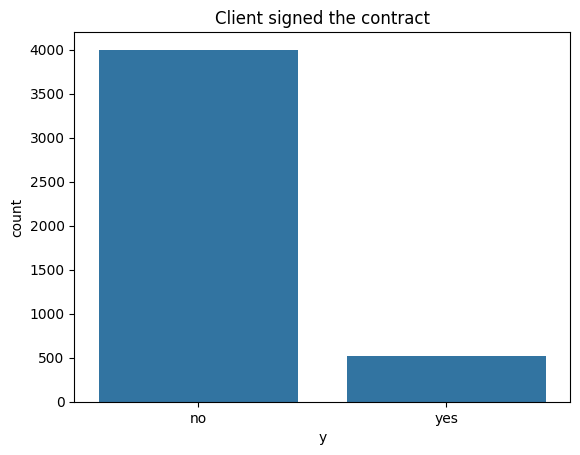

In [ ]:
# check for unbalancedness of the dataset
# Visualization
sns.countplot(x='y', data=dataset)
plt.title("Client signed the contract")
plt.show()


In [ ]:
# Remove the duration column from the dataset
dataset.drop('duration',axis=1,inplace=True)
dataset.head()


# replace label y: no -> 0 and yes -> 1
dataset['y'] = dataset['y'].replace({'no':0,'yes':1})
dataset.head()



<ipython-input-40-2dfcd312af4b>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['y'] = dataset['y'].replace({'no':0,'yes':1})


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,0


In [ ]:
# One hot encoding of categorical features
dataset = pd.get_dummies(dataset, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
dataset.head()


,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,33,4789,11,1,339,4,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
2,35,1350,16,1,330,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,30,1476,3,4,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,59,0,5,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


Create a trainig set and test set.
Make sure you have 1000 samples in the test set and use a random_state = 0.

In [ ]:
# Split into features and targets
X = dataset.drop('y',axis=1)
y = dataset['y']


# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


# MinMax scaler normalisation or standard scaler normalization

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)





## Training of the classifiers

Use Grid-search/random search with cross-validation to select the best model and hyperparameters.


**Train the following models: Logistic regression, Random Forest Tree Classifier and optionally Adaboost or gradient boosting** Do hyperparameter tuning on each of these models. Also change the cross-validation parameter K. Don't forget to scale the data. ** Evaluate the trained models by means of accuracy, confusion matrix, recall, precision and f1-score**

Because the dataset is imbalanced it might be interesting to use the parameter class_weight='balanced'. This hyperparemter is supported by most of the classification models.
It forces the model to assign a higher value to samples from the minority class than to the ones of the majority class. Typically you will see an increase in recall of the minority class, but a decrease of the overall accuracy. Explain why this is the case.



In [ ]:
# Logistic regression
model = LogisticRegression()
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear']}

             ]

grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)




Best accuracy :  0.8950162288956168
Best parameters : {'C': np.float64(100.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.67      0.13      0.22       186

    accuracy                           0.88      1492
   macro avg       0.78      0.56      0.58      1492
weighted avg       0.86      0.88      0.85      1492

[[1294   12]
 [ 162   24]]
88.3378016085791


In [ ]:
# Logistic Regression Grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

# Random Forest Grid
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# AdaBoost Grid (Optional)
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Gradient Boosting Grid (Optional)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}


In [ ]:
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)


In [ ]:
models = {
    "Logistic Regression": (lr, lr_param_grid),
    "Random Forest": (rf, rf_param_grid),
    "AdaBoost": (ab, ab_param_grid),
    "Gradient Boosting": (gb, gb_param_grid)
}

# Store the best models
best_models = {}


In [ ]:
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=2,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # Save the best model
    best_models[model_name] = grid_search.best_estimator_

    # Print the best parameters and scores
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best F1-Score for {model_name}:", grid_search.best_score_)


Training Logistic Regression...
Fitting 2 folds for each of 60 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Logistic Regression: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'lbfgs'}
Best F1-Score for Logistic Regression: 0.31867004883722744
Training Random Forest...
Fitting 2 folds for each of 405 candidates, totalling 810 fits


In [ ]:
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nAccuracy:", accuracy_score(y_test, y_pred) * 100)



Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1306
           1       0.22      0.55      0.32       186

    accuracy                           0.71      1492
   macro avg       0.57      0.64      0.57      1492
weighted avg       0.83      0.71      0.75      1492


Confusion Matrix:
[[952 354]
 [ 84 102]]

Accuracy: 70.64343163538874

Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1306
           1       0.37      0.35      0.36       186

    accuracy                           0.85      1492
   macro avg       0.64      0.63      0.64      1492
weighted avg       0.84      0.85      0.84      1492


Confusion Matrix:
[[1195  111]
 [ 120   66]]

Accuracy: 84.51742627345844

Evaluating AdaBoost...

Classification Report:
              precision    recall  f1-sc

In [ ]:
# Support Vector machine

from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm_model = SVC()

# Define the parameter grid for hyperparameter tuning
svm_params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
}

# Perform GridSearchCV for hyperparameter tuning
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best SVM parameters:", svm_grid.best_params_)
print("Best SVM accuracy:", svm_grid.best_score_)

# Predict on the test set using the best model
y_pred_svm = svm_grid.predict(X_test)

# Evaluate the SVM model
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print("SVM accuracy on test set:", accuracy_score(y_test, y_pred_svm) * 100)


Best SVM parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM accuracy: 0.8966680304394077
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.70      0.14      0.23       186

    accuracy                           0.89      1492
   macro avg       0.80      0.57      0.59      1492
weighted avg       0.87      0.89      0.85      1492

[[1295   11]
 [ 160   26]]
SVM accuracy on test set: 88.53887399463807


In [ ]:
# Random forest trees

# Random Forest Classifier
number_of_trees = 500
max_number_of_features = 13

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features,class_weight='balanced')


RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)

# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)





[0.13017741 0.14675806 0.11538676 0.05996491 0.04342613 0.02600825
 0.01317209 0.01809137 0.0056041  0.00552905 0.01373683 0.00904445
 0.00792214 0.00921468 0.00394417 0.0157075  0.00341249 0.00112057
 0.01051901 0.01679202 0.01447185 0.01171376 0.01471376 0.01477382
 0.00456129 0.00250623 0.00268047 0.01456492 0.01418683 0.0122568
 0.01137963 0.014795   0.005581   0.03045366 0.01252765 0.01411163
 0.00135626 0.00802728 0.00447517 0.01458768 0.00992895 0.00925622
 0.01590235 0.01297969 0.01225382 0.00417103 0.00614906 0.00318419
 0.03307263 0.01384538]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.66      0.10      0.18       186

    accuracy                           0.88      1492
   macro avg       0.77      0.55      0.56      1492
weighted avg       0.86      0.88      0.84      1492

[[1296   10]
 [ 167   19]]
88.1367292225201


In [ ]:
# Adaboost - optional

# Adaboost

clf_adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=0.90)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.70      0.14      0.23       186

    accuracy                           0.89      1492
   macro avg       0.80      0.57      0.59      1492
weighted avg       0.87      0.89      0.85      1492

[[1295   11]
 [ 160   26]]
88.53887399463807


In [ ]:
# Adaboost with logistic regression classifier - optional

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cart = LogisticRegression(C=1.0, solver='liblinear', max_iter=500)
logreg_adaboost = AdaBoostClassifier(estimator=cart, n_estimators=50, learning_rate=0.9)
logreg_adaboost.fit(X_train, y_train)

y_pred = logreg_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)



              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.61      0.12      0.21       186

    accuracy                           0.88      1492
   macro avg       0.75      0.56      0.57      1492
weighted avg       0.85      0.88      0.84      1492

[[1291   15]
 [ 163   23]]
88.06970509383379


In [ ]:
# Gradient boosting - optional
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set the parameters
clf_gradientboost = GradientBoostingClassifier(
    n_estimators=300,            # Use fewer trees to reduce overfitting
    learning_rate=0.05,          # Lower learning rate for stability
    max_depth=4,                 # Limit tree depth to prevent overfitting
    min_samples_split=10,        # Require more samples per split
    min_samples_leaf=5,          # Require a minimum number of samples per leaf
    subsample=0.8,               # Use stochastic gradient boosting
    random_state=42
)

# Train the model
clf_gradientboost.fit(X_train, y_train)

# Predict on the test set
y_pred = clf_gradientboost.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)





              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1306
           1       0.56      0.16      0.24       186

    accuracy                           0.88      1492
   macro avg       0.72      0.57      0.59      1492
weighted avg       0.85      0.88      0.85      1492

[[1283   23]
 [ 157   29]]
Accuracy: 87.93565683646113


## Optimization

- Are there features that may be discarded? If so, which ones? You can find the features importances if you use random forest trees by calling **tree.feature_importances_**.
- What are the three most important features?
- Retrain the models with the 10 most important features.

In [ ]:
# Get feature importances
importance_scores = RFCmodel.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_scores
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 3 most important features
top_3_features = importance_df.head(3)
print("Top 3 Most Important Features:")
print(top_3_features)

# Print the least important features (potential candidates for removal)
least_important_features = importance_df.tail(10)
print("\nLeast Important Features (Potentially Discardable):")
print(least_important_features)


Top 3 Most Important Features:
   Feature  Importance
1  balance    0.143814
0      age    0.132658
2      day    0.105065

Least Important Features (Potentially Discardable):
              Feature  Importance
38          month_jan    0.005558
16     job_unemployed    0.005385
32  contact_telephone    0.005067
8    job_entrepreneur    0.004543
14        job_student    0.004066
47     poutcome_other    0.003587
25         default_no    0.003374
36          month_dec    0.003279
26        default_yes    0.002223
17        job_unknown    0.002196


In [ ]:
import pandas as pd

# Convert back to DataFrame with original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Select the top 10 features
top_10_features = importance_df.head(10)['Feature'].tolist()

# Filter the top 10 features
X_train_top10 = X_train_df[top_10_features]
X_test_top10 = X_test_df[top_10_features]

print(X_train_top10.head())


    balance       age       day  campaign     pdays  poutcome_success  \
0  0.050403  0.220588  0.333333  0.020408  0.000000               0.0   
1  0.047482  0.308824  0.366667  0.020408  0.384174               0.0   
2  0.028415  0.588235  0.566667  0.020408  0.000000               0.0   
3  0.028443  0.161765  0.500000  0.000000  0.098624               0.0   
4  0.028415  0.264706  0.166667  0.000000  0.000000               0.0   

   contact_unknown  previous  job_blue-collar  marital_married  
0              0.0      0.00              0.0              1.0  
1              0.0      0.04              1.0              1.0  
2              0.0      0.00              1.0              1.0  
3              0.0      0.04              0.0              0.0  
4              1.0      0.00              0.0              1.0  


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=500, random_state=42)
logreg_model.fit(X_train_top10, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_top10)

# Print evaluation metrics
print("Logistic Regression with Top 10 Features:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)


Logistic Regression with Top 10 Features:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.72      0.14      0.23       186

    accuracy                           0.89      1492
   macro avg       0.81      0.57      0.59      1492
weighted avg       0.87      0.89      0.85      1492

Confusion Matrix:
[[1296   10]
 [ 160   26]]
Accuracy: 88.6058981233244


In [ ]:
# Most important features + conclusions
# Determine the most important features that contribute to employee turnover.
# You can use the feature_importances values computed by a random forest tree
# more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Visualize feature importance scores if applicable.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Train the RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=15, random_state=42)
RFCmodel.fit(X_train, y_train)

# Get feature importance scores
importance_scores = RFCmodel.feature_importances_

# Get feature names (assuming your features are in a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))





             Feature  Importance
1            balance    0.143814
0                age    0.132658
2                day    0.105065
48  poutcome_success    0.054650
3           campaign    0.054392
4              pdays    0.051896
5           previous    0.027513
19   marital_married    0.018100
27        housing_no    0.017966
10    job_management    0.016827


             Feature  Importance
1            balance    0.143814
0                age    0.132658
2                day    0.105065
48  poutcome_success    0.054650
3           campaign    0.054392
4              pdays    0.051896
5           previous    0.027513
19   marital_married    0.018100
27        housing_no    0.017966
10    job_management    0.016827

Top 3 Most Important Features:
   Feature  Importance
1  balance    0.143814
0      age    0.132658
2      day    0.105065